In [1]:
# Load needed Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling
- Data Assessing by printing the first five rows

In [2]:
df=pd.read_csv(r"C:\Users\kapitoo\Videos\samy_python\BMW sales data (2010-2024) (1) (1).csv")

In [3]:
# dissplay all data columns
pd.options.display.max_columns=None

In [4]:
# display first rws
df.head(5)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [5]:
# copy the dataframe
df_copy = df.copy()

In [6]:
# check for data size
df.shape

(50000, 11)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


#s

In [9]:
# Add total_profit column (Price_USD × Sales_Volume) and reorder columns
df['Total_Profit']= df['Sales_Volume'] * df['Price_USD']
df=df[['Model','Year','Region','Color','Fuel_Type','Transmission','Engine_Size_L','Mileage_KM','Price_USD','Sales_Volume','Total_Profit','Sales_Classification']]
# check
df.head(2)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Total_Profit,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,819542000,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,271562732,Low


- ## Analysis & Plotting Stage

In [10]:
## Identify top-selling car type by highest sales volume
top_selling_car_type=df.groupby('Model')['Sales_Volume'].sum().sort_values(ascending=False)
top_selling_car_type= top_selling_car_type.reset_index()
top_selling_car_type

,Model,Sales_Volume
0,7 Series,23786466
1,i8,23423891
2,X1,23406060
3,3 Series,23281303
4,i3,23133849
5,5 Series,23097519
6,M5,22779688
7,X3,22745529
8,X5,22709749
9,X6,22661986


In [11]:
# Identify top-selling car model by total profit
top_profitable_car= df.groupby('Model')['Total_Profit'].sum().sort_values(ascending=False)
top_profitable_car= top_profitable_car.reset_index()
top_profitable_car

,Model,Total_Profit
0,7 Series,1790070249282
1,3 Series,1768534028214
2,i8,1764743448529
3,X1,1752985285361
4,5 Series,1735712423092
5,i3,1724197530210
6,X5,1708653383772
7,X3,1707951188482
8,M5,1698467355916
9,X6,1693423254979


In [12]:
# Aggregate total profit by car model and year
grouped_profit=df.groupby(['Model','Year']) ['Total_Profit'].sum().reset_index()
# Select top-earning car model for each year
top_model_per_year= grouped_profit.loc[grouped_profit.groupby('Year')['Total_Profit'].idxmax()].reset_index(drop=True)
#check
top_model_per_year

,Model,Year,Total_Profit
0,3 Series,2010,123206927162
1,X1,2011,125185650431
2,i3,2012,130936886917
3,X1,2013,124753447920
4,X1,2014,127543477611
5,7 Series,2015,125946080416
6,5 Series,2016,131081665600
7,7 Series,2017,132758608891
8,i8,2018,123898240776
9,i3,2019,126195179741


In [13]:
# Identify regions with highest car sales by model
sales_regions= df.groupby(['Region','Model'])['Sales_Volume'].sum().reset_index()
sales_regions

top_sales_regions= sales_regions.loc[sales_regions.groupby('Region')['Sales_Volume'].idxmax()].sort_values('Sales_Volume',ascending=False).reset_index(drop=True)
#check
top_sales_regions

,Region,Model,Sales_Volume
0,Europe,i8,4202401
1,Asia,X1,4192289
2,North America,7 Series,4087259
3,Middle East,7 Series,4080751
4,South America,X6,4023804
5,Africa,5 Series,4020702


In [25]:
# Identify the most sold fuel type by units
top_fuel_type= df.groupby('Fuel_Type') ['Sales_Volume'].sum().sort_values(ascending=False)
top_fuel_type=top_fuel_type.reset_index()
#check
top_fuel_type

,Fuel_Type,Sales_Volume
0,Hybrid,64532097
1,Petrol,63324154
2,Electric,63157665
3,Diesel,62361818


In [26]:
# Identify the most profitable fuel type
top_profit_fuel=df.groupby('Fuel_Type')['Total_Profit'].sum().sort_values(ascending=False)
top_profit_fuel=top_profit_fuel.reset_index()
top_profit_fuel

,Fuel_Type,Total_Profit
0,Hybrid,4820671669300
1,Petrol,4756136615908
2,Electric,4750735161530
3,Diesel,4684699087721


In [27]:
# Identify the most common fuel type in each region
most_common_fuel_by_region = df.groupby('Region')['Fuel_Type'].apply(lambda x: x.mode()[0]).reset_index()
most_common_fuel_by_region

,Region,Fuel_Type
0,Africa,Hybrid
1,Asia,Hybrid
2,Europe,Hybrid
3,Middle East,Petrol
4,North America,Hybrid
5,South America,Petrol


In [28]:
# check 
df.head(2)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Total_Profit,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,819542000,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,271562732,Low


In [29]:
# Identify the most sold car color by units
top_selling_color = df.groupby('Color')['Sales_Volume'].sum().sort_values(ascending=False)
top_selling_color=top_selling_color.reset_index()
#check
top_selling_color

,Color,Sales_Volume
0,Red,42750183
1,Silver,42674022
2,White,42272954
3,Grey,41995141
4,Blue,41972741
5,Black,41710693


In [30]:
# Counting sold cars by transmission type
transmission_sales_count=df['Transmission'].value_counts().reset_index()
transmission_sales_count

,Transmission,count
0,Manual,25154
1,Automatic,24846


In [31]:
# Distribution of cars by engine capaci
engine_capacity_liters=df['Engine_Size_L'].value_counts().reset_index().head(5)
engine_capacity_liters

,Engine_Size_L,count
0,3.8,1511
1,2.5,1486
2,4.5,1475
3,1.9,1471
4,2.6,1470


In [32]:
colors = [
    '#1f77b4',  # أزرق داكن
    '#ff7f0e',  # برتقالي
    '#2ca02c',  # أخضر
    '#d62728',  # أحمر
    '#9467bd',  # بنفسجي
    '#8c564b',  # بني
    '#e377c2',  # وردي
    '#7f7f7f',  # رمادي
    '#bcbd22',  # أخضر مصفر
    '#17becf'   # أزرق سماوي
]

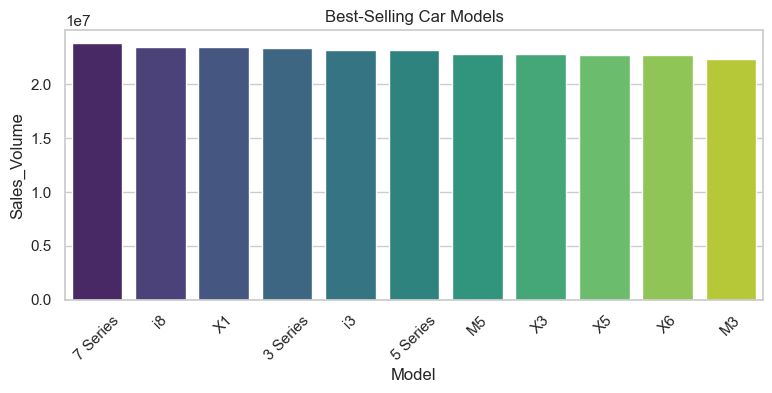

In [33]:
plt.figure(figsize=(9,3.5))
sns.barplot(data=top_selling_car_type,x='Model',y='Sales_Volume',hue='Model',palette='viridis')
plt.xticks(rotation=45)
plt.title('Best-Selling Car Models')
plt.show()

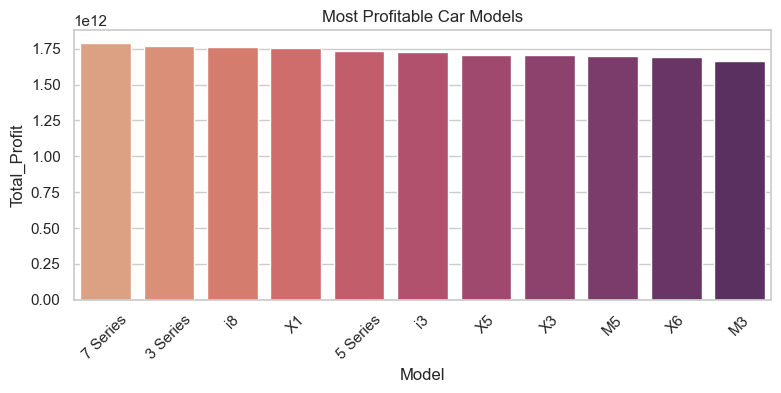

In [34]:
plt.figure(figsize=(9,3.5))
sns.barplot(data=top_profitable_car,x='Model',y='Total_Profit',hue='Model',palette='flare')
plt.xticks(rotation=45)
plt.title('Most Profitable Car Models')
plt.show()

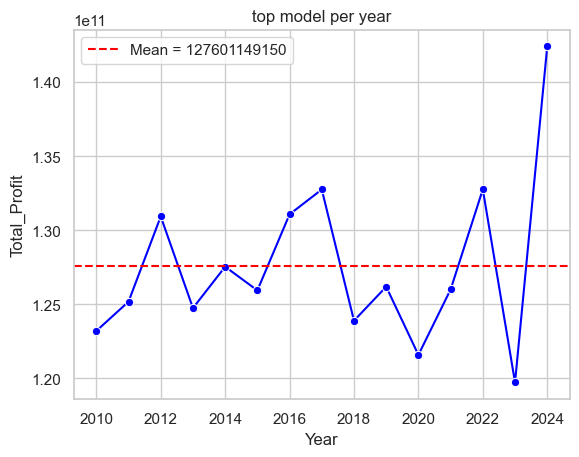

In [35]:
sns.lineplot(data=top_model_per_year,x='Year',y='Total_Profit',marker='o',color='blue')
mean_sales=top_model_per_year['Total_Profit'].mean()
plt.axhline(mean_sales,color='red',linestyle='--',label=f'Mean = {mean_sales:.0f}')
plt.legend()
plt.title('top model per year')
plt.show()

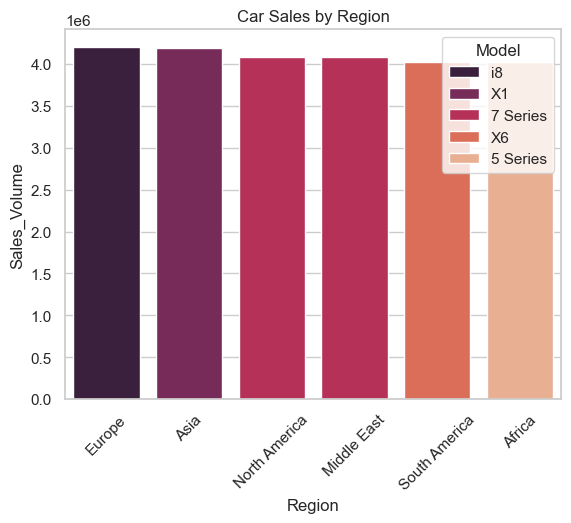

In [36]:
sns.barplot(data=top_sales_regions,x='Region',y='Sales_Volume',hue='Model',palette='rocket')
plt.title('Car Sales by Region')
plt.xticks(rotation=45)
plt.show()

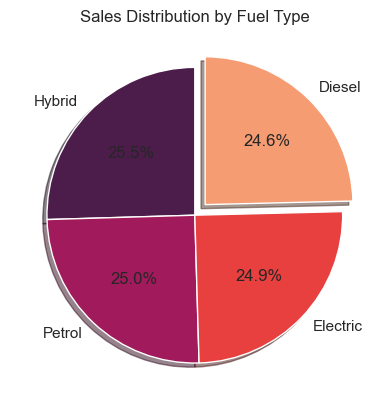

In [37]:
size = top_fuel_type['Sales_Volume'].abs()
labels = top_fuel_type['Fuel_Type']
colorr=sns.color_palette("rocket",len(labels))
plt.pie(size, labels=labels, autopct='%1.1f%%', startangle=90,colors=colorr,explode=[0,0,0,0.1],shadow=True)
plt.title("Sales Distribution by Fuel Type")
plt.show()

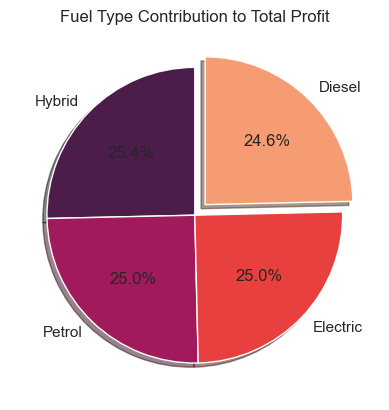

In [38]:
size = top_profit_fuel['Total_Profit'].abs()
labels = top_profit_fuel['Fuel_Type']
colorr=sns.color_palette("rocket",len(labels))
plt.pie(size, labels=labels, autopct='%1.1f%%', startangle=90,colors=colorr,explode=[0,0,0,0.1],shadow=True)
plt.title("Fuel Type Contribution to Total Profit")
plt.show()

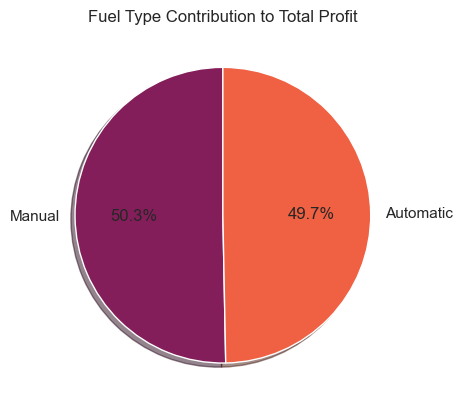

In [39]:
size = transmission_sales_count['count'].abs()
labels = transmission_sales_count['Transmission']
colorr=sns.color_palette("rocket",len(labels))
plt.pie(size, labels=labels, autopct='%1.1f%%', startangle=90,colors=colorr,shadow=True)
plt.title("Fuel Type Contribution to Total Profit")
plt.show()

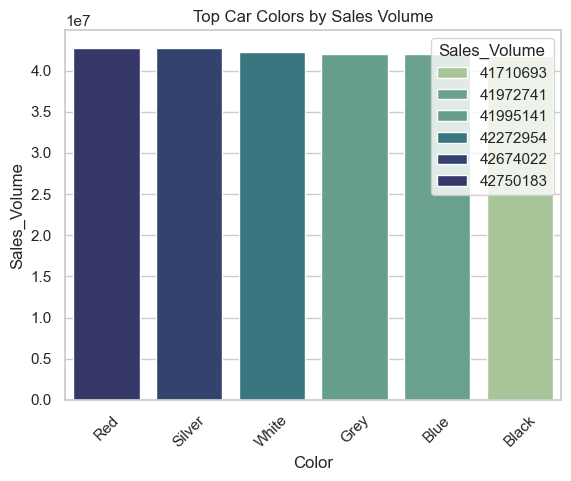

In [40]:
sns.barplot(data=top_selling_color ,x='Color',y='Sales_Volume',hue='Sales_Volume',palette='crest')
plt.title('Top Car Colors by Sales Volume')
plt.xticks(rotation=45)
plt.show()

C:\Users\kapitoo\AppData\Local\Temp\ipykernel_12296\4110914917.py:1: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(data=engine_capacity_liters,x='Engine_Size_L',y='count',hue='count',palette=colors)


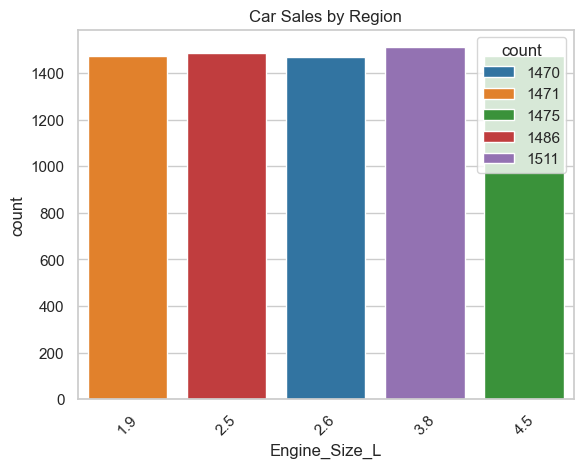

In [41]:
sns.barplot(data=engine_capacity_liters,x='Engine_Size_L',y='count',hue='count',palette=colors)
plt.title('Car Sales by Region')
plt.xticks(rotation=45)
plt.show()

C:\Users\kapitoo\AppData\Local\Temp\ipykernel_12296\3601806779.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Price_USD', data=df, palette='Set2')


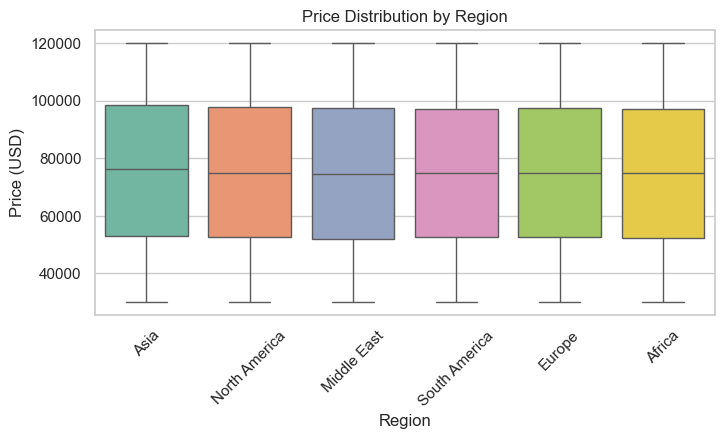

In [42]:
plt.figure(figsize=(8,3.7))
sns.boxplot(x='Region', y='Price_USD', data=df, palette='Set2')
plt.title('Price Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)  
plt.show()

In [18]:
# Correlation between engine size, mileage, and car price
corr_df = df[['Engine_Size_L','Mileage_KM','Price_USD']].corr()
corr_df

,Engine_Size_L,Mileage_KM,Price_USD
Engine_Size_L,1.000000,-0.004906,0.000146
Mileage_KM,-0.004906,1.000000,-0.004238
Price_USD,0.000146,-0.004238,1.000000


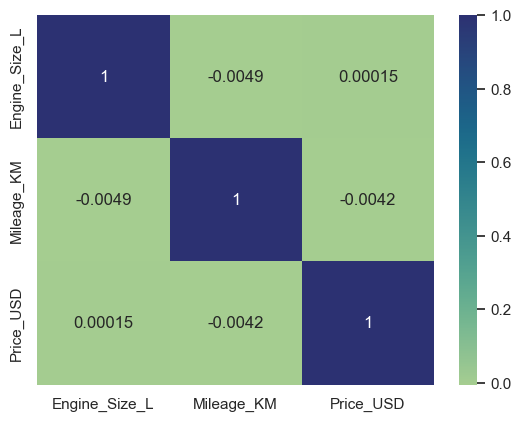

In [22]:
# This heatmap shows the relationship between engine size, mileage, and the price of each car
sns.heatmap(corr_df,annot=True,cmap='crest')
plt.show()

- * Conclusion

- Top-selling models: 7 Series, i8, X1, 3 Series.

- Most profitable models: 7 Series, 3 Series, i8.

- Best model varies by year: X1, 7 Series, 5 Series.

- Regional preferences: i8 in Europe, X1 in Asia, 7 Series in North America & Middle East, X6 in South America, 5 Series in Africa.

- Most sold fuel types: Hybrid, Petrol, Electric, Diesel.

- Popular colors: Red, Silver, White, Grey, Blue, Black.

- Transmission: Manual slightly more than Automatic.

- Engine size and mileage: Minimal correlation with price.